### Importing necessary libraries

In [119]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

### Load wine dataset

In [120]:
wine = load_wine()
feature_names = wine.feature_names
X = wine.data
y = wine.target

### Define fitness function

In [121]:
def predict_accuracy(individual):
    # Extract features
    features = []
    for i in range(len(individual)):
        if individual[i]:
            features.append(i)
    if len(features) == 0:
        return 0
    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X[:, features], y)
    # Calculate accuracy
    accuracy = knn.score(X[:, features], y)
    return accuracy


### Define plotting fitness

In [122]:
def plot_fitness(fitness_scores):
    x = [i + 1 for i in range(len(fitness_scores))]
    y = fitness_scores

    plt.plot(x, y)
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Generation Vs Best Population Fitness')
    plt.show()

### Define genetic algorithm

In [123]:
def genetic_algorithm(pop_size, num_generations, mutation_rate):

    # Tells fitness scores of best population in each generation
    best_fitness = list()

    # Initialize population
    population = np.random.randint(2, size=(pop_size, X.shape[1]))

    # Iterate through generations
    for generation in range(num_generations):
        # Calculate fitness scores
        fitness_scores = np.array([predict_accuracy(individual) for individual in population])
        
        # Append accuracy of population with best fitness score in this generation
        best_fitness.append(max(fitness_scores))

        # Select parents
        parent_indices = np.random.choice(pop_size, size=pop_size, replace=True, p=fitness_scores/fitness_scores.sum())
        parents = population[parent_indices]
        
        # Create offspring
        offspring = np.zeros_like(parents)
        
        for i in range(pop_size):
            # Crossover
            crossover_point = np.random.randint(X.shape[1])
            offspring[i] = np.concatenate((parents[i, :crossover_point], parents[(i+1)%pop_size, crossover_point:]))
            
            # Mutation
            for j in range(X.shape[1]):
                if np.random.rand() < mutation_rate:
                    offspring[i, j] = 1 - offspring[i, j]
        
        # Replace population with offspring
        population = offspring
    
    # Calculate list of final fitness scores
    fitness_scores = np.array([predict_accuracy(individual) for individual in population])
    best_fitness.append(max(fitness_scores))
    
    plot_fitness(best_fitness)
    # Return individual with highest fitness score
    return population[np.argmax(fitness_scores)]


### Run genetic algorithm

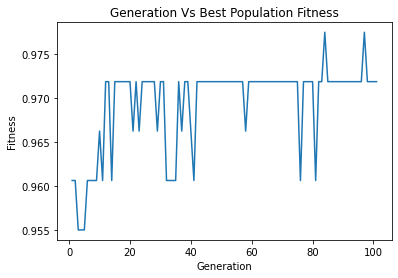

Best features: ['alcohol', 'alcalinity_of_ash', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines']
Accuracy: 97.19%


In [124]:
best_individual = genetic_algorithm(pop_size=100, num_generations=100, mutation_rate=0.01)
best_features = list()

for i in range(len(best_individual)):
    if best_individual[i]:
        best_features.append(i)

print(f"Best features: {[feature_names[i] for i in best_features]}")

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X[:, best_features], y)
print("Accuracy: {:.2f}%".format(knn.score(X[:, best_features], y)*100))

### As we can see that Fitness score majorly increases with generations although there are some mutations so sometimes fitness scores drops 